<div class="alert alert-block alert-success">
<h4><center>Harshil Patel (pmb5br@virginia.edu) DS 5001 Spring 2023</center></h4>
</div>

<hr>

<div class="alert alert-block alert-info">
<h3><center> The Sun Also Rises, by Ernest Hemingway</center></h3>
</div>

<hr>

<div class="alert alert-block alert-warning">
<h4><center>Notebook 3: Content</center></h4> 
<ul>
  <li>Sentiment Analysis using NLP Techniques
    <ul>
      <li>Sentiment Analysis with Sentences</li>
      <li>Sentiment Analysis with Tokens</li>
      <li>Sentiment Analysis using VADER Library</li>
      <li>Naive Bayes Classifier for Identifying Notable Text Features of Positive and Negative Sentiments</li>
    </ul>
  </li>
  <li>Token-Time Matrix</li>
  <li>Visualizing Token Frequency Distribution using Dispersion Plots and Kernel Density Estimation (KDE) Plots</li>
  <li>Implementing Stemming using Porter, Snowball, and Lancaster Stemmers</li>
</ul>
    
Tables saved - sents-sentimentsandsubjectivity, tokens-sentimentsandsubjectivity, VADERpos, VADERneg, tokens_nltk, vocab_nltk
    
</div>

<hr>

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import seaborn as sns
import networkx as nx

In [2]:
with open(f"../data/pg67138.txt", 'r', encoding='utf-8-sig') as file:
    epub_read = file.readlines()[88:10224]
    txt = " ".join(epub_read).replace('\n \n', '').replace('\n', '')


In [3]:
txt[:500]

' Robert Cohn was once middleweight boxing champion of Princeton. Do not think that I am very much impressed by that as a boxing title, but it meant a lot to Cohn. He cared nothing for boxing, in fact he disliked it, but he learned it painfully and thoroughly to counteract the feeling of inferiority and shyness he had felt on being treated as a Jew at Princeton. There was a certain inner comfort in knowing he could knock down anybody who was snooty to him, although, being very shy and a thoroughl'

In [4]:
sentence_list = nltk.sent_tokenize(txt)  

In [5]:
stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}  
for word in nltk.word_tokenize(txt):  
    if word not in stopwords and word not in ".":
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [6]:
series = pd.Series(word_frequencies)
df = pd.DataFrame(series)
df = df.reset_index()
df=df.rename(columns={"index": "token_str", 0: "n"}) 

In [7]:
df

,token_str,n
0,Robert,108
1,Cohn,222
2,middleweight,3
3,boxing,7
4,champion,3
...,...,...
5960,Via,1
5961,mounted,1
5962,khaki,1
5963,directing,1


In [8]:
df = df.drop(df[df.token_str.str.contains(r'[^0-9a-zA-Z]')].index)

In [9]:
df_top10 = df.sort_values(ascending = False, by =['n'] )[:13]
df_top10

,token_str,n
8,I,2329
331,said,962
15,He,530
195,The,459
1120,Brett,424
230,It,377
2183,Bill,331
321,We,329
389,You,324
152,went,297


In [10]:
for word in word_frequencies.keys():  
    word_frequencies[word] = (word_frequencies[word]/962)

In [11]:
sentence_scores = {}  
for sent in sentence_list:  
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

### Use NLP Techniques to get Novel Summary

In [12]:
import heapq  
summary_sentences = heapq.nlargest(10, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)  
print(summary)

“Listen, Jake,” he said, “are you really a Catholic?” “Technically.” “What does that mean?” “I don’t know.” “All right, I’ll go to sleep now,” he said. “What possessed you to bring her?” “I don’t know, I just brought her.” “You’re getting damned romantic.” “No, bored.” “Now?” “No, not now.” “Let’s get out of here. He’s nice.” “I’ll send him away.” “No, don’t.” “Yes, I’ll send him away.” “You can’t just like that.” “Can’t I, though? How are you called?” “Jacob.” “That’s a Flemish name.” “American too.” “You’re not Flamand?” “No, American.” “Good, I detest Flamands.” By this time we were at the restaurant. “You’ve been asleep two days.” “No,” said Cohn, “what time is it?” “It’s ten o’clock.” “What a lot we’ve drunk.” “You mean what a lot _we’ve_ drunk. When is that?” “Saturday.” “We _will_ have to get ready.” “I say,” said Mike, “I’m going to the barber’s.” “I must bathe,” said Brett. I just feel happy about him.” “Good.” “I wish the wind would drop, though.” “It’s liable to go down by f

### Sentiment Analysis

In [13]:
df_sentence = pd.DataFrame(sentence_list,columns=['Sentence'])
df_sentence

,Sentence
0,Robert Cohn was once middleweight boxing cham...
1,Do not think that I am very much impressed by ...
2,"He cared nothing for boxing, in fact he dislik..."
3,There was a certain inner comfort in knowing h...
4,He was Spider Kelly’s star pupil.
...,...
5621,"“Oh, Jake,” Brett said, “we could have had suc..."
5622,He raised his baton.
5623,The car slowed suddenly pressing Brett against...
5624,"“Yes,” I said."


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Harshil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


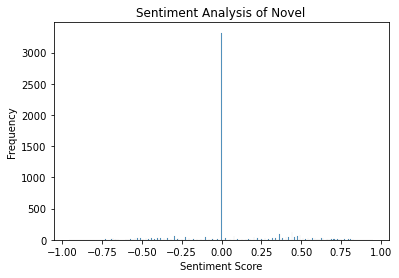

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
df = df_sentence
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['Sentence'].apply(lambda x: sia.polarity_scores(x)['compound'])

sns.histplot(df['sentiment'], kde=False)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Novel')
plt.show()


In [15]:
from pattern.en import sentiment
sentiment_list = []
for i in df_sentence['Sentence']:
    word = sentiment(i)
    sentiment_list.append(word)

In [16]:
df_sent = pd.DataFrame(sentiment_list)
joint = pd.concat([df_sentence, df_sent], axis=1)
joint=joint.rename(columns={0: "Sentiment Score", 1: "Subjectivity"})
joint

,Sentence,sentiment,Sentiment Score,Subjectivity
0,Robert Cohn was once middleweight boxing cham...,0.5994,0.000000,0.000000
1,Do not think that I am very much impressed by ...,0.2935,1.000000,1.000000
2,"He cared nothing for boxing, in fact he dislik...",-0.8555,-0.450000,0.750000
3,There was a certain inner comfort in knowing h...,0.7478,0.001746,0.535397
4,He was Spider Kelly’s star pupil.,0.0000,0.000000,0.000000
...,...,...,...,...
5621,"“Oh, Jake,” Brett said, “we could have had suc...",0.0772,0.350000,0.550000
5622,He raised his baton.,0.0000,0.000000,0.000000
5623,The car slowed suddenly pressing Brett against...,0.0000,0.000000,0.500000
5624,"“Yes,” I said.",0.0000,0.000000,0.000000


In [17]:
joint.sort_values(ascending = False, by = ['Sentiment Score','Subjectivity'])[20:40].style.background_gradient()

,Sentence,sentiment,Sentiment Score,Subjectivity
5342,The Tour de France was the greatest sporting event in the world.,0.636900,1.000000,1.000000
1282,"I have been around a very great deal.” “Drink your wine,” said Brett.",0.659000,1.000000,0.975000
120,I had discovered that was the best way to get rid of friends.,0.807400,1.000000,0.300000
1827,We got some of the best fishing in the State of Montana.,0.636900,1.000000,0.300000
2673,"I’d best stop on here, though.",0.458800,1.000000,0.300000
4102,The bulls are my best friends.” I translated to Brett.,0.636900,1.000000,0.300000
4816,"Belmonte, in his best days, worked always in the terrain of the bull.",0.636900,1.000000,0.300000
5575,It is one of the best restaurants in the world.,0.636900,1.000000,0.300000
2644,He was very pleasant and went with us twice to the Irati River.,0.556300,0.953333,1.000000
1360,"Michael’s the best dancer I know.” “He’s splendid.” “He’s got his points.” “I like him,” I said.",0.771700,0.916667,0.650000


In [18]:
joint['Sentiment Score'].describe()

count    5626.000000
mean        0.054798
std         0.260343
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.071280
max         1.000000
Name: Sentiment Score, dtype: float64

The sentiment score ranges from -1 to 1. Between the minimum and maximum values, 50% had a sentiment score of 0, which means a neutral sentence. 75% of the sentences had a sentiment score of 0.071280.

In [19]:
joint['Subjectivity'].describe()

count    5626.000000
mean        0.257702
std         0.320171
min         0.000000
25%         0.000000
50%         0.000000
75%         0.500000
max         1.000000
Name: Subjectivity, dtype: float64

### Sentiment of Each Token in the Novel

In [20]:
sentence_list = nltk.sent_tokenize(txt) 
stopwords = nltk.corpus.stopwords.words('english')

In [21]:
word_frequencies = {}  
for word in nltk.word_tokenize(txt):  
    if word not in stopwords and word not in ".":
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [22]:
series = pd.Series(word_frequencies)
df = pd.DataFrame(series)
df = df.reset_index()
df=df.rename(columns={"index": "token_str", 0: "n"}) 
df

,token_str,n
0,Robert,108
1,Cohn,222
2,middleweight,3
3,boxing,7
4,champion,3
...,...,...
5960,Via,1
5961,mounted,1
5962,khaki,1
5963,directing,1


In [23]:
from pattern.en import sentiment
sentiment_list2 = []
for i in df['token_str']:
    word = sentiment(i)
    sentiment_list2.append(word)

In [24]:
df_word = pd.DataFrame(sentiment_list2)
joint2 = pd.concat([df, df_word], axis=1)
joint2=joint2.rename(columns={0: "Sentiment Score", 1: "Subjectivity"})
joint2

,token_str,n,Sentiment Score,Subjectivity
0,Robert,108,0.0,0.0
1,Cohn,222,0.0,0.0
2,middleweight,3,0.0,0.0
3,boxing,7,0.0,0.0
4,champion,3,0.0,0.0
...,...,...,...,...
5960,Via,1,0.0,0.0
5961,mounted,1,0.0,0.0
5962,khaki,1,0.0,0.0
5963,directing,1,0.0,0.0


In [25]:
joint2.sort_values(ascending = False, by = ['Sentiment Score','Subjectivity'])[:20].style.background_gradient()

,token_str,n,Sentiment Score,Subjectivity
10,impressed,5,1.000000,1.000000
507,perfect,6,1.000000,1.000000
989,wonderful,20,1.000000,1.000000
1214,priceless,1,1.000000,1.000000
1223,wonderfully,1,1.000000,1.000000
1341,perfectly,4,1.000000,1.000000
1427,Wonderful,7,1.000000,1.000000
2095,Perfectly,1,1.000000,1.000000
2399,excellent,1,1.000000,1.000000
2513,wonderful.,4,1.000000,1.000000


In [26]:
joint2['Subjectivity'].describe()

count    5965.000000
mean        0.066677
std         0.214325
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Subjectivity, dtype: float64

In [27]:
joint2['Sentiment Score'].describe()

count    5965.000000
mean        0.003595
std         0.147956
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Sentiment Score, dtype: float64

In [28]:
csv_file = f"../data/output/sents-sentimentsandsubjectivity.csv"
joint.to_csv(csv_file)

In [29]:
csv_file = f"../data/output/tokens-sentimentsandsubjectivity.csv"
joint2.to_csv(csv_file)

### Sentiment of Sentences Looking using VADER Library and Sentiment Intensity Analyzer

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

sid=nltk.sentiment.vader.SentimentIntensityAnalyzer()

In [31]:
df_sentence['Score']=df_sentence.Sentence.apply(lambda x: sid.polarity_scores(x))
df_sentence['CompScore']=df_sentence.Score.apply(lambda x: x.get("compound"))
df_sentence['PosScore']=df_sentence.Score.apply(lambda x: x.get("pos"))
df_sentence['NegScore']=df_sentence.Score.apply(lambda x: x.get("neg"))
df_sentence['NeuScore']=df_sentence.Score.apply(lambda x: x.get("neu"))

df_sentence = df_sentence.drop(["Score"], axis=1)

df_sentence['PosFlag'] = df_sentence.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
df_sentence['NegFlag'] = df_sentence.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
df_sentence['NeuFlag'] = df_sentence.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

df_sentence.head(20)
df_sentence.mean()['CompScore']

0.04981578386064719

In [32]:
df_sentence

,Sentence,sentiment,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag
0,Robert Cohn was once middleweight boxing cham...,0.5994,0.5994,0.328,0.000,0.672,1,0,0
1,Do not think that I am very much impressed by ...,0.2935,0.2935,0.108,0.000,0.892,1,0,0
2,"He cared nothing for boxing, in fact he dislik...",-0.8555,-0.8555,0.082,0.270,0.649,0,1,0
3,There was a certain inner comfort in knowing h...,0.7478,0.7478,0.248,0.059,0.693,1,0,0
4,He was Spider Kelly’s star pupil.,0.0000,0.0000,0.000,0.000,1.000,0,0,1
...,...,...,...,...,...,...,...,...,...
5621,"“Oh, Jake,” Brett said, “we could have had suc...",0.0772,0.0772,0.118,0.106,0.776,1,0,0
5622,He raised his baton.,0.0000,0.0000,0.000,0.000,1.000,0,0,1
5623,The car slowed suddenly pressing Brett against...,0.0000,0.0000,0.000,0.000,1.000,0,0,1
5624,"“Yes,” I said.",0.0000,0.0000,0.000,0.000,1.000,0,0,1


In [33]:
print('There are', df_sentence['PosFlag'].sum(), "positive sentences,", \
      df_sentence['NegFlag'].sum(), "negative sentences, and", \
      df_sentence['NeuFlag'].sum(), "neutral sentences")
print('This is a total of', \
      df_sentence['PosFlag'].sum()+df_sentence['NegFlag'].sum()+df_sentence['NeuFlag'].sum(), "sentences")

There are 1392 positive sentences, 878 negative sentences, and 3356 neutral sentences
This is a total of 5626 sentences


In [34]:
PosTable = df_sentence.loc[df_sentence['PosFlag'] == 1].reset_index()\
    .drop(['index'], axis=1)

NegTable = df_sentence.loc[df_sentence['NegFlag'] == 1].reset_index()\
    .drop(['index'], axis=1)

In [35]:
PosTable

,Sentence,sentiment,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag
0,Robert Cohn was once middleweight boxing cham...,0.5994,0.5994,0.328,0.000,0.672,1,0,0
1,Do not think that I am very much impressed by ...,0.2935,0.2935,0.108,0.000,0.892,1,0,0
2,There was a certain inner comfort in knowing h...,0.7478,0.7478,0.248,0.059,0.693,1,0,0
3,Spider Kelly taught all his young gentlemen to...,0.1027,0.1027,0.125,0.076,0.799,1,0,0
4,But it seemed to fit Cohn.,0.5023,0.5023,0.394,0.000,0.606,1,0,0
...,...,...,...,...,...,...,...,...,...
1387,It was hot and bright.,0.4404,0.4404,0.420,0.000,0.580,1,0,0
1388,I put my arm around her and she rested against...,0.4215,0.4215,0.219,0.000,0.781,1,0,0
1389,"It was very hot and bright, and the houses loo...",0.4877,0.4877,0.223,0.000,0.777,1,0,0
1390,"“Oh, Jake,” Brett said, “we could have had suc...",0.0772,0.0772,0.118,0.106,0.776,1,0,0


In [36]:
NegTable

,Sentence,sentiment,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag
0,"He cared nothing for boxing, in fact he dislik...",-0.8555,-0.8555,0.082,0.270,0.649,0,1,0
1,"I mistrust all frank and simple people, especi...",-0.0772,-0.0772,0.035,0.053,0.912,0,1,0
2,"No one had ever made him feel he was a Jew, an...",-0.2960,-0.2960,0.000,0.095,0.905,0,1,0
3,"He was married five years, had three children,...",-0.6369,-0.6369,0.052,0.141,0.807,0,1,0
4,As he had been thinking for months about leavi...,-0.8683,-0.8683,0.000,0.246,0.754,0,1,0
...,...,...,...,...,...,...,...,...,...
873,Think of that.” “Anything you want me to think...,-0.4939,-0.4939,0.073,0.197,0.730,0,1,0
874,He never cared about anything but bull-fightin...,-0.1695,-0.1695,0.000,0.106,0.894,0,1,0
875,“It’s rotten here in the hotel.,-0.5106,-0.5106,0.000,0.398,0.602,0,1,0
876,Let’s have another bottle of _rioja alta_.” “I...,-0.3400,-0.3400,0.000,0.130,0.870,0,1,0


In [37]:
csv_file = f"../data/output/VADERpos.csv"
PosTable.to_csv(csv_file)

In [38]:
csv_file = f"../data/output/VADERneg.csv"
NegTable.to_csv(csv_file)

In [39]:
from nltk.tokenize import sent_tokenize

PosList=[]
NegList=[]

for x in PosTable.Sentence:
    PosList.extend(sent_tokenize(x))    

for x in NegTable.Sentence:
    NegList.extend(sent_tokenize(x))

In [40]:
def word_bayes(words):
    return dict([(word, True) for word in words.split() if word not in stopwords])

PosBayes = [(word_bayes(sentence), 'positive') for sentence in PosList]
NegBayes = [(word_bayes(sentence), 'negative') for sentence in NegList]

Now using Naive Bayes Classifier to look for most notable text features of Positive and Negative Sentiment

In [41]:
from nltk.classify import NaiveBayesClassifier

PosSplit=int(PosTable.PosFlag.sum()/2)
NegSplit=int(NegTable.NegFlag.sum()/2)

sentiment_classifier = NaiveBayesClassifier.train(PosBayes[:PosSplit]+NegBayes[:NegSplit])

In [42]:
accuracy = nltk.classify.util.accuracy(sentiment_classifier, PosBayes[:PosSplit]+NegBayes[:NegSplit])*100
accuracy

98.41409691629957

In [43]:
print("Set accuracy: %.3f" % (accuracy,))

Set accuracy: 98.414


In [44]:
accuracy2 = nltk.classify.util.accuracy(sentiment_classifier, PosBayes[PosSplit:]+NegBayes[NegSplit:])*100

In [45]:
print("Set accuracy: %.3f" % (accuracy2,))

Set accuracy: 71.718


In [46]:
sentiment_classifier.show_most_informative_features()

Most Informative Features
                    hell = True           negati : positi =     26.9 : 1.0
                 stopped = True           negati : positi =     13.8 : 1.0
                    nice = True           positi : negati =      9.5 : 1.0
                     pay = True           negati : positi =      9.0 : 1.0
                   great = True           positi : negati =      8.2 : 1.0
                  rotten = True           negati : positi =      7.3 : 1.0
                    hand = True           positi : negati =      6.9 : 1.0
                     cut = True           negati : positi =      6.9 : 1.0
                    good = True           positi : negati =      6.0 : 1.0
                     San = True           negati : positi =      5.8 : 1.0


### Token-Time Matrix

In [47]:
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

In [48]:
def tokenize(doc_df, OHCO=OHCO, remove_pos_tuple=False, ws=False):
    
    # Paragraphs to Sentences
    df = doc_df.para_str\
        .apply(lambda x: pd.Series(nltk.sent_tokenize(x)))\
        .stack()\
        .to_frame()\
        .rename(columns={0:'sent_str'})
    
    # Sentences to Tokens
    # Local function to pick tokenizer
    def word_tokenize(x):
        if ws:
            s = pd.Series(nltk.pos_tag(nltk.WhitespaceTokenizer().tokenize(x)))
        else:
            s = pd.Series(nltk.pos_tag(nltk.word_tokenize(x))) # Discards stuff in between
        return s
            
    df = df.sent_str\
        .apply(word_tokenize)\
        .stack()\
        .to_frame()\
        .rename(columns={0:'pos_tuple'})
    
    # Grab info from tuple
    df['pos'] = df.pos_tuple.apply(lambda x: x[1])
    df['token_str'] = df.pos_tuple.apply(lambda x: x[0])
    if remove_pos_tuple:
        df = df.drop('pos_tuple', 1)
    
    # Add index
    df.index.names = OHCO
    
    return df

In [49]:
DOC = pd.read_csv(f"../data/output/para.csv", index_col=0)

In [50]:
TOKEN_NLTK_ANNOTATED = tokenize(DOC, ['chap_num', 'sent_num', 'token_num'], ws=False)

In [51]:
TOKEN_NLTK_ANNOTATED.groupby(TOKEN_NLTK_ANNOTATED.pos).count()

,pos_tuple,token_str
pos,,
$,2,2
'',29,29
(,1,1
),1,1
",",3674,3674
.,8003,8003
:,64,64
CC,2571,2571
CD,520,520


In [52]:
TOKEN_NLTK_ANNOTATED

pos_tuple  pos     token_str
chap_num sent_num token_num                                       
1        0        0               (Robert, NNP)  NNP        Robert
                  1                 (Cohn, NNP)  NNP          Cohn
                  2                  (was, VBD)  VBD           was
                  3                  (once, RB)   RB          once
                  4          (middleweight, JJ)   JJ  middleweight
...                                         ...  ...           ...
19       1        8                    (so, RB)   RB            so
                  9                      (?, .)    .             ?
                  10                    (”, NN)   NN             ”
         0        0                   (THE, DT)   DT           THE
                  1                   (END, NN)   NN           END

[90224 rows x 3 columns]

In [53]:
TOKEN_NLTK_ANNOTATED[TOKEN_NLTK_ANNOTATED.pos.str.match('^NNP')]

pos_tuple  pos  token_str
chap_num sent_num token_num                                  
1        0        0             (Robert, NNP)  NNP     Robert
                  1               (Cohn, NNP)  NNP       Cohn
                  8          (Princeton, NNP)  NNP  Princeton
         1        22              (Cohn, NNP)  NNP       Cohn
         2        35               (Jew, NNP)  NNP        Jew
...                                       ...  ...        ...
19       2        5              (Brett, NNP)  NNP      Brett
         0        1                (Yes, NNP)  NNP        Yes
                  3                  (”, NNP)  NNP          ”
         1        1                (Isn, NNP)  NNP        Isn
                  2                  (’, NNP)  NNP          ’

[6002 rows x 3 columns]

In [54]:
BOOK = TOKEN_NLTK_ANNOTATED.copy()

In [55]:
BOOK['term_str'] = BOOK['token_str'].str.lower().str.replace(r'[\W_]', '').dropna()

<ipython-input-55-9cb8d4e11efd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  BOOK['term_str'] = BOOK['token_str'].str.lower().str.replace(r'[\W_]', '').dropna()


In [56]:
BOOK.head()

pos_tuple  pos     token_str  \
chap_num sent_num token_num                                          
1        0        0               (Robert, NNP)  NNP        Robert   
                  1                 (Cohn, NNP)  NNP          Cohn   
                  2                  (was, VBD)  VBD           was   
                  3                  (once, RB)   RB          once   
                  4          (middleweight, JJ)   JJ  middleweight   

                                 term_str  
chap_num sent_num token_num                
1        0        0                robert  
                  1                  cohn  
                  2                   was  
                  3                  once  
                  4          middleweight

In [57]:
TTM = pd.get_dummies(BOOK['term_str'], columns=['term_str'], prefix='', prefix_sep='', drop_first=True)\
    .reset_index(drop=True).iloc[:,1:]
TTM.index.name = 'time_id'

In [58]:
cfg = {'figsize': (20,1)}

### Visualize Dispersion Plots of Words

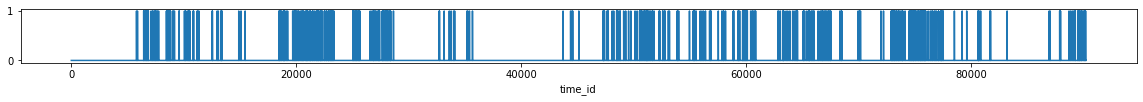

In [59]:
TTM['brett'].plot(**cfg);

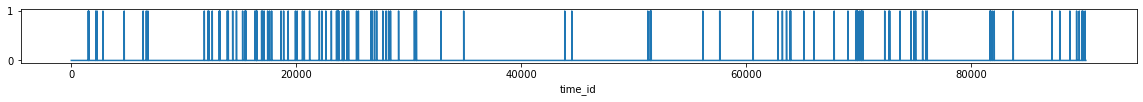

In [60]:
TTM['jake'].plot(**cfg);

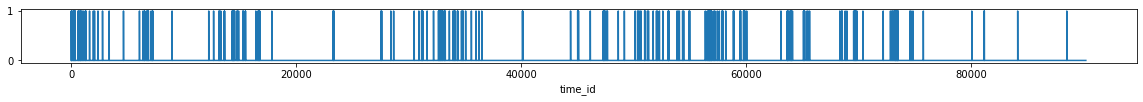

In [61]:
TTM['cohn'].plot(**cfg);

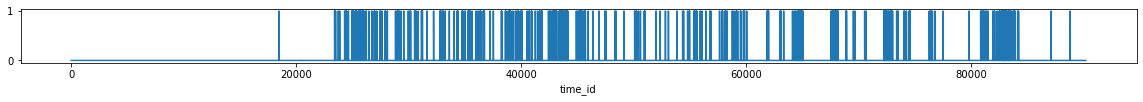

In [62]:
TTM['bill'].plot(**cfg);

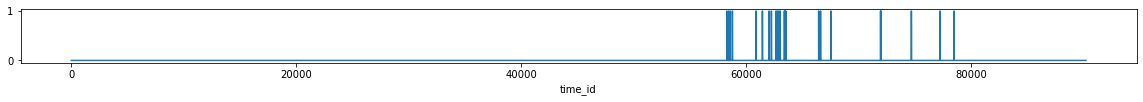

In [63]:
TTM['pedro'].plot(**cfg);

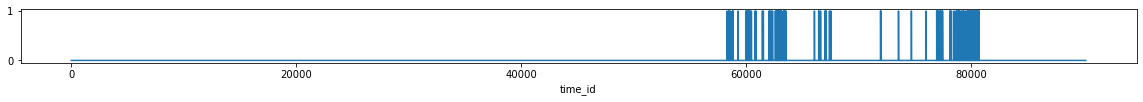

In [64]:
TTM['romero'].plot(**cfg);

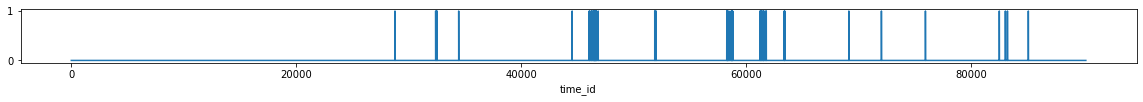

In [65]:
TTM['montoya'].plot(**cfg);

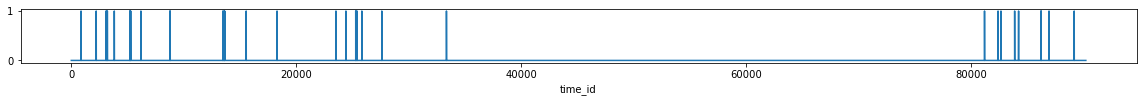

In [66]:
TTM['paris'].plot(**cfg);

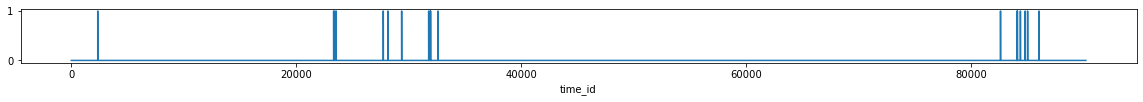

In [67]:
TTM['spain'].plot(**cfg);

### Seaborn Strip Plots

In [68]:
sns.set()
%matplotlib inline

In [69]:
def plot_words(words, book):    
    X = book[book.term_str.isin(words)]
    plt.figure(figsize=(22, len(words)))
    ax = sns.stripplot(y='term_str', x='offset', data=X, orient='h', marker=".", color='navy', size=15, jitter=0)
    ax.set_title('Dispersion Plots', size=30, pad=20)
    ax.set_xlabel('Narrative Time', size=20)
    ax.set_ylabel('Token', size=20)
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(rotation=0, fontsize=20)
    plt.tight_layout()
    plt.show()

In [70]:
B = BOOK['term_str'].reset_index(drop=True).to_frame().reset_index().rename(columns={'index':'offset'})

In [71]:
names = 'jake barnes brett ashley robert cohn bill mike pedro montoya clyne belmonte stone'.split()

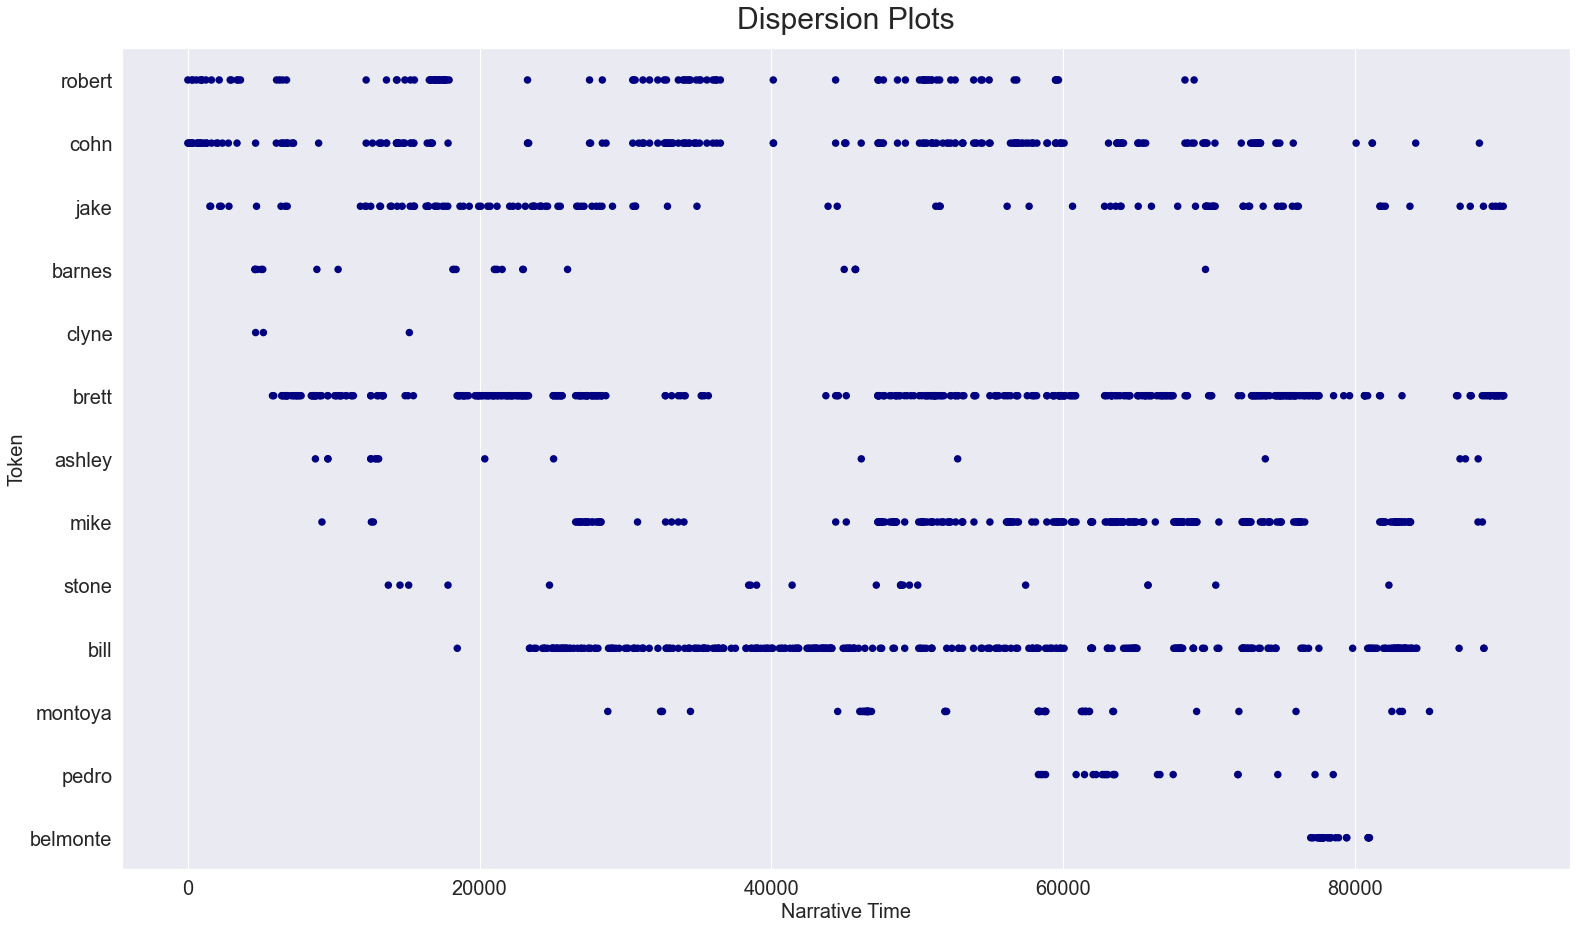

In [72]:
plot_words(names, B)

### Visualize using KDE Plots

In [73]:
kde_kernel = 'gaussian'
kde_bandwidth = 2000
kde_samples = 1000

In [74]:
import numpy as np
import scipy as sp
from sklearn.neighbors import KernelDensity as KDE
from nltk.corpus import stopwords

In [75]:
X = B.reset_index().groupby(['term_str']).offset.apply(lambda x: x.tolist()).to_frame()

In [76]:
X['x'] = X.apply(lambda x: np.array(x.offset)[:, np.newaxis], 1)

In [77]:
X.head()

,offset,x
term_str,,
,"[9, 25, 33, 39, 45, 72, 91, 93, 102, 110, 115,...","[[9], [25], [33], [39], [45], [72], [91], [93]..."
118,[71954],[[71954]]
17th,[83903],[[83903]]
183260,[9484],[[9484]]
1905,[89181],[[89181]]


In [78]:
scale_max = B.offset.max()
x_axis = np.linspace(0, scale_max, kde_samples)[:, np.newaxis]
X['kde'] = X.apply(lambda row: KDE(kernel=kde_kernel, bandwidth=kde_bandwidth).fit(row.x), 1)
X['scores'] = X.apply(lambda row: row.kde.score_samples(x_axis), axis=1)

In [79]:
PLOTS = X.apply(lambda row: pd.Series(np.exp(row.scores) * (scale_max / kde_samples)), axis=1)

In [80]:
FIG = dict(figsize=(15, 5))

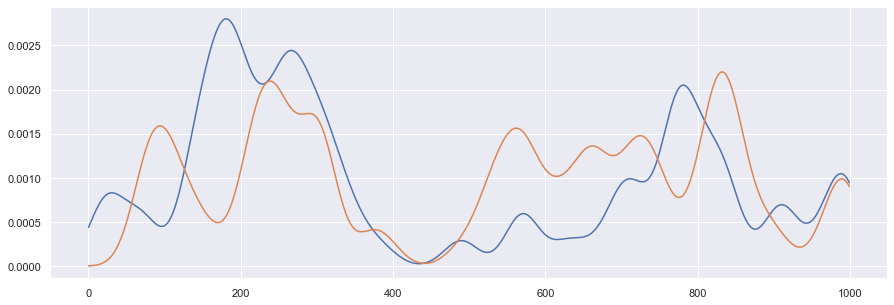

In [81]:
PLOTS.loc['jake'].plot(**FIG);
PLOTS.loc['brett'].plot(**FIG);

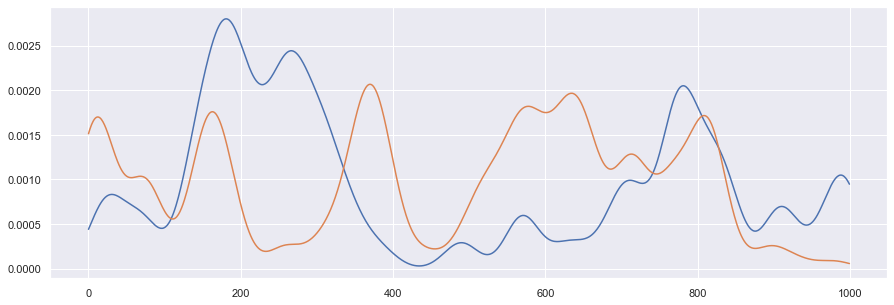

In [82]:
PLOTS.loc['jake'].plot(**FIG);
PLOTS.loc['cohn'].plot(**FIG);

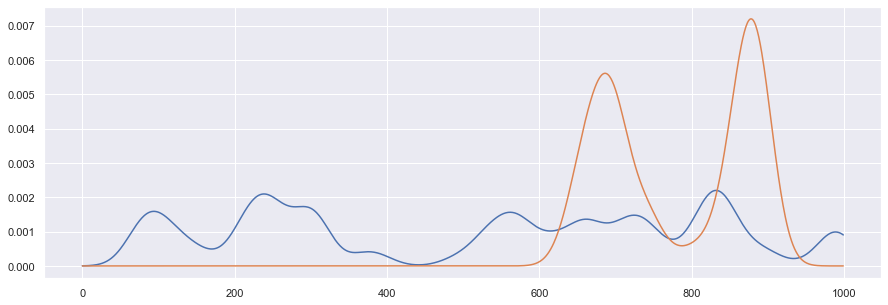

In [83]:
PLOTS.loc['brett'].plot(**FIG);
PLOTS.loc['romero'].plot(**FIG);

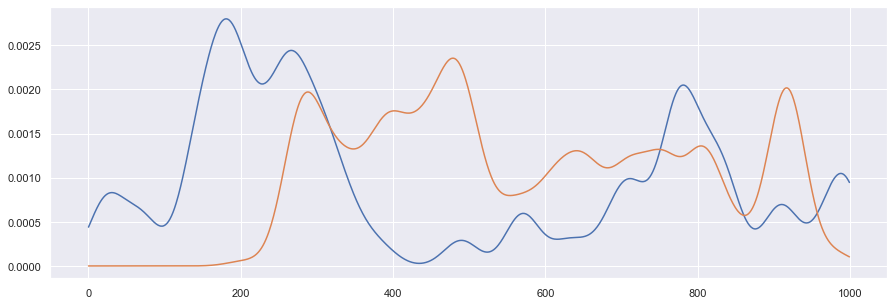

In [84]:
PLOTS.loc['jake'].plot(**FIG);
PLOTS.loc['bill'].plot(**FIG);

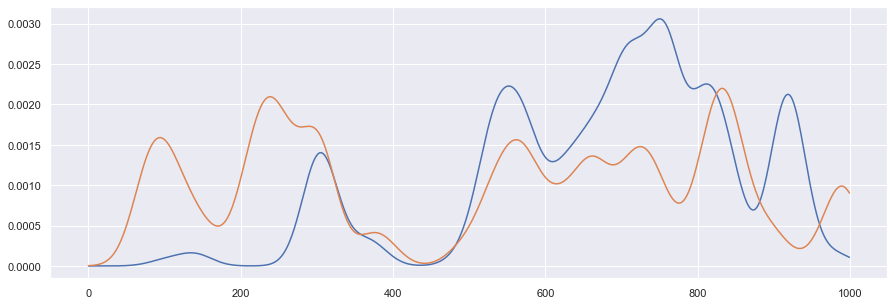

In [85]:
PLOTS.loc['mike'].plot(**FIG);
PLOTS.loc['brett'].plot(**FIG);

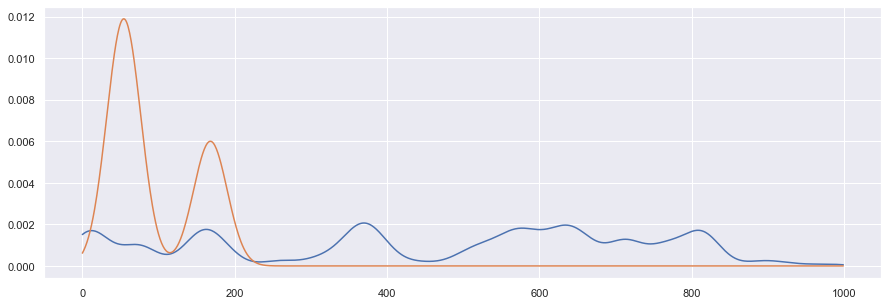

In [86]:
PLOTS.loc['cohn'].plot(**FIG);
PLOTS.loc['clyne'].plot(**FIG);

### Stemming using porter snowball lancaster

In [87]:
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

In [88]:
TOKEN_NLTK_ANNOTATED['term_str'] = TOKEN_NLTK_ANNOTATED['token_str'].str.lower().str.replace('[\W_]', '')
VOCAB_FROM_NLTK = TOKEN_NLTK_ANNOTATED.term_str.value_counts().to_frame()\
    .rename(columns={'index':'term_str', 'term_str':'n'})\
    .sort_index().reset_index().rename(columns={'index':'term_str'})
VOCAB_FROM_NLTK.index.name = 'term_id'
VOCAB_FROM_NLTK['num'] = VOCAB_FROM_NLTK.term_str.str.match("\d+").astype('int')

<ipython-input-88-da56a433e02f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  TOKEN_NLTK_ANNOTATED['term_str'] = TOKEN_NLTK_ANNOTATED['token_str'].str.lower().str.replace('[\W_]', '')


In [89]:
TOKEN_NLTK_ANNOTATED

pos_tuple  pos     token_str  \
chap_num sent_num token_num                                          
1        0        0               (Robert, NNP)  NNP        Robert   
                  1                 (Cohn, NNP)  NNP          Cohn   
                  2                  (was, VBD)  VBD           was   
                  3                  (once, RB)   RB          once   
                  4          (middleweight, JJ)   JJ  middleweight   
...                                         ...  ...           ...   
19       1        8                    (so, RB)   RB            so   
                  9                      (?, .)    .             ?   
                  10                    (”, NN)   NN             ”   
         0        0                   (THE, DT)   DT           THE   
                  1                   (END, NN)   NN           END   

                                 term_str  
chap_num sent_num token_num                
1        0        0                robert  
                  1                  cohn  
                  2                   was  
                  3                  once  
                  4          middleweight  
...                                   ...  
19       1        8                    so  
                  9                        
                  10                       
         0        0                   the  
                  1                   end  

[90224 rows x 4 columns]

In [90]:
csv_file = f"../data/output/tokens_nltk.csv"
TOKEN_NLTK_ANNOTATED.to_csv(csv_file)

In [91]:
VOCAB_FROM_NLTK

,term_str,n,num
term_id,,,
0,,20514,0
1,118,1,1
2,17th,1,1
3,183260,1,1
4,1905,1,1
...,...,...,...
4887,zonda,2,0
4888,à,1,0
4889,æsthetics,1,0


### Annotating VOCAB Table

In [92]:
sw = pd.DataFrame(nltk.corpus.stopwords.words('english'), columns=['term_str'])
sw = sw.reset_index().set_index('term_str')
sw.columns = ['dummy']
sw.dummy = 1

VOCAB_FROM_NLTK['stop'] = VOCAB_FROM_NLTK.term_str.map(sw.dummy)
VOCAB_FROM_NLTK['stop'] = VOCAB_FROM_NLTK['stop'].fillna(0).astype('int')

In [93]:
VOCAB_FROM_NLTK[VOCAB_FROM_NLTK.stop == 0].sample(10) #looking at a random sample to see if done correctly, 0 is no to stop words, 1 is yes to stop words

,term_str,n,num,stop
term_id,,,,
2022,heads,13,0,0
1367,eggs,6,0,0
3341,r,1,0,0
4093,stony,1,0,0
557,brighteyed,1,0,0
3891,smashed,1,0,0
1803,garrison,1,0,0
3225,powdering,1,0,0
2152,idea,17,0,0


### Adding Stems to VOCAB Table

In [94]:
from nltk.stem.porter import PorterStemmer
stemmer1 = PorterStemmer()
VOCAB_FROM_NLTK['stem_porter'] = VOCAB_FROM_NLTK.term_str.apply(stemmer1.stem)

from nltk.stem.snowball import SnowballStemmer
stemmer2 = SnowballStemmer("english")
VOCAB_FROM_NLTK['stem_snowball'] = VOCAB_FROM_NLTK.term_str.apply(stemmer2.stem)

from nltk.stem.lancaster import LancasterStemmer
stemmer3 = LancasterStemmer()
VOCAB_FROM_NLTK['stem_lancaster'] = VOCAB_FROM_NLTK.term_str.apply(stemmer3.stem)
VOCAB_FROM_NLTK

,term_str,n,num,stop,stem_porter,stem_snowball,stem_lancaster
term_id,,,,,,,
0,,20514,0,0,,,
1,118,1,1,0,118,118,118
2,17th,1,1,0,17th,17th,17th
3,183260,1,1,0,183260,183260,183260
4,1905,1,1,0,1905,1905,1905
...,...,...,...,...,...,...,...
4887,zonda,2,0,0,zonda,zonda,zond
4888,à,1,0,0,à,à,à
4889,æsthetics,1,0,0,æsthetic,æsthetic,æsthetics


In [95]:
csv_file = f"../data/output/vocab_nltk.csv"
VOCAB_FROM_NLTK.to_csv(csv_file)

In [96]:
pos_max = TOKEN_NLTK_ANNOTATED.groupby('term_str')['pos'].apply(lambda x: x.value_counts().head(1)) #adding pos_max to VOCAB table
df_pos = pos_max.to_frame()
df_pos = df_pos.reset_index() 
df_pos.columns = ['term_str',"pos_max",'count']
df_pos

,term_str,pos_max,count
0,,.,8003
1,118,CD,1
2,17th,CD,1
3,183260,CD,1
4,1905,CD,1
...,...,...,...
4887,zonda,NNP,2
4888,à,NN,1
4889,æsthetics,NNS,1
4890,œuvre,NNP,1


In [97]:
merge_df = df_pos.merge(VOCAB_FROM_NLTK, how = "left", on = "term_str")
merge_df.head()

,term_str,pos_max,count,n,num,stop,stem_porter,stem_snowball,stem_lancaster
0,,.,8003,20514,0,0,,,
1,118,CD,1,1,1,0,118,118,118
2,17th,CD,1,1,1,0,17th,17th,17th
3,183260,CD,1,1,1,0,183260,183260,183260
4,1905,CD,1,1,1,0,1905,1905,1905


### Most Frequent stem_porter

In [98]:
most_freq = merge_df["stem_porter"].groupby(merge_df['stem_porter']).count().sort_values(ascending=False)

In [99]:
porter = merge_df.groupby('stem_porter')
STEMP = porter.stem_porter.count().sort_values(ascending = False).to_frame('n')
STEMP['terms'] = porter.apply(lambda x: ' '.join(x.term_str)).to_frame('')
STEMP

,n,terms
stem_porter,,
care,6,care cared careful carefully cares caring
wonder,5,wonder wondered wonderful wonderfully wondering
bullfight,5,bullfight bullfighter bullfighters bullfightin...
close,5,close closed closely closeness closing
enjoy,5,enjoy enjoyable enjoyed enjoying enjoys
...,...,...
god,1,god
goddam,1,goddam
goe,1,goes


In [100]:
STEMP[STEMP['n']==5].head(10)

,n,terms
stem_porter,,
wonder,5,wonder wondered wonderful wonderfully wondering
bullfight,5,bullfight bullfighter bullfighters bullfightin...
close,5,close closed closely closeness closing
enjoy,5,enjoy enjoyable enjoyed enjoying enjoys
announc,5,announce announced announcement announcements ...


In [101]:
gener = merge_df[merge_df['stem_porter']== "care"]
gener

,term_str,pos_max,count,n,num,stop,stem_porter,stem_snowball,stem_lancaster
682,care,NN,7,10,0,0,care,care,car
683,cared,VBD,5,5,0,0,care,care,car
686,careful,JJ,4,4,0,0,care,care,car
687,carefully,RB,7,7,0,0,care,care,car
689,cares,VBZ,2,2,0,0,care,care,car
690,caring,VBG,1,1,0,0,care,care,car


In [102]:
gener.term_str.to_list()

['care', 'cared', 'careful', 'carefully', 'cares', 'caring']

In [103]:
wonder = merge_df[merge_df['stem_porter']== "wonder"]
wonder

,term_str,pos_max,count,n,num,stop,stem_porter,stem_snowball,stem_lancaster
4808,wonder,VBP,5,10,0,0,wonder,wonder,wond
4809,wondered,VBD,2,3,0,0,wonder,wonder,wond
4810,wonderful,JJ,25,31,0,0,wonder,wonder,wond
4811,wonderfully,RB,2,2,0,0,wonder,wonder,wond
4812,wondering,VBG,2,2,0,0,wonder,wonder,wond


In [104]:
bullfight = merge_df[merge_df['stem_porter']== "bullfight"]
bullfight

,term_str,pos_max,count,n,num,stop,stem_porter,stem_snowball,stem_lancaster
602,bullfight,NN,15,30,0,0,bullfight,bullfight,bullfight
603,bullfighter,NN,17,28,0,0,bullfight,bullfight,bullfight
604,bullfighters,NNS,19,19,0,0,bullfight,bullfight,bullfight
605,bullfighting,NN,12,16,0,0,bullfight,bullfight,bullfight
606,bullfights,NNS,7,7,0,0,bullfight,bullfight,bullfight


In [105]:
bullfight.term_str.to_list()

['bullfight', 'bullfighter', 'bullfighters', 'bullfighting', 'bullfights']

### Most Frequent stem_snowball

In [106]:
most_freq2 = merge_df["stem_snowball"].groupby(merge_df['stem_snowball']).count().sort_values(ascending=False)

In [107]:
snowball = merge_df.groupby('stem_snowball')
STEMP2 = snowball.stem_snowball.count().sort_values(ascending = False).to_frame('n')
STEMP2['terms'] = snowball.apply(lambda x: ' '.join(x.term_str)).to_frame('')
STEMP2

,n,terms
stem_snowball,,
care,6,care cared careful carefully cares caring
seem,5,seem seemed seeming seemingly seems
clear,5,clear cleared clearing clearings clearly
close,5,close closed closely closeness closing
bullfight,5,bullfight bullfighter bullfighters bullfightin...
...,...,...
joselito,1,joselito
jota,1,jota
journey,1,journey


In [108]:
STEMP2[STEMP2['n']==5]

,n,terms
stem_snowball,,
seem,5,seem seemed seeming seemingly seems
clear,5,clear cleared clearing clearings clearly
close,5,close closed closely closeness closing
bullfight,5,bullfight bullfighter bullfighters bullfightin...
enjoy,5,enjoy enjoyable enjoyed enjoying enjoys
announc,5,announce announced announcement announcements ...
wonder,5,wonder wondered wonderful wonderfully wondering


In [109]:
blind_snowball = merge_df[merge_df['stem_snowball']== "care"]
blind_snowball

,term_str,pos_max,count,n,num,stop,stem_porter,stem_snowball,stem_lancaster
682,care,NN,7,10,0,0,care,care,car
683,cared,VBD,5,5,0,0,care,care,car
686,careful,JJ,4,4,0,0,care,care,car
687,carefully,RB,7,7,0,0,care,care,car
689,cares,VBZ,2,2,0,0,care,care,car
690,caring,VBG,1,1,0,0,care,care,car


In [110]:
seem_snowball = merge_df[merge_df['stem_snowball']== "seem"]
seem_snowball

,term_str,pos_max,count,n,num,stop,stem_porter,stem_snowball,stem_lancaster
3664,seem,VB,7,9,0,0,seem,seem,seem
3665,seemed,VBD,31,32,0,0,seem,seem,seem
3666,seeming,VBG,3,3,0,0,seem,seem,seem
3667,seemingly,RB,1,1,0,0,seemingli,seem,seem
3668,seems,VBZ,5,6,0,0,seem,seem,seem


In [111]:
clear_snowball = merge_df[merge_df['stem_snowball']== "clear"]
clear_snowball

,term_str,pos_max,count,n,num,stop,stem_porter,stem_snowball,stem_lancaster
825,clear,JJ,12,12,0,0,clear,clear,clear
826,cleared,VBN,1,1,0,0,clear,clear,clear
827,clearing,VBG,2,3,0,0,clear,clear,clear
828,clearings,NNS,1,1,0,0,clear,clear,clear
829,clearly,RB,3,4,0,0,clearli,clear,clear


### Most Frequent stem_lancaster

In [112]:
most_freq3 = merge_df["stem_lancaster"].groupby(merge_df['stem_lancaster']).count().sort_values(ascending=False)

In [113]:
lancaster = merge_df.groupby('stem_lancaster')
STEMP3 = lancaster.stem_lancaster.count().sort_values(ascending = False).to_frame('n')
STEMP3['terms'] = lancaster.apply(lambda x: ' '.join(x.term_str)).to_frame('')
STEMP3

,n,terms
stem_lancaster,,
fin,10,final finally finances financial fine fineness...
car,9,car care cared careers careful carefully cares...
pass,8,pass passable passage passed passes passing pa...
adv,8,advance advantage adventure adventures advice ...
not,7,not note notice noticeable noticed notices notre
...,...,...
lif,1,life
lifework,1,lifework
chil,1,chill


In [114]:
fin_lancaster = merge_df[merge_df['stem_lancaster']== "fin"]
fin_lancaster

,term_str,pos_max,count,n,num,stop,stem_porter,stem_snowball,stem_lancaster
1592,final,JJ,2,2,0,0,final,final,fin
1593,finally,RB,25,25,0,0,final,final,fin
1594,finances,NNS,1,1,0,0,financ,financ,fin
1595,financial,JJ,1,1,0,0,financi,financi,fin
1597,fine,JJ,35,52,0,0,fine,fine,fin
1598,fineness,NN,1,1,0,0,fine,fine,fin
1599,fines,NNS,1,1,0,0,fine,fine,fin
1604,finish,VB,6,8,0,0,finish,finish,fin
1605,finished,VBD,6,10,0,0,finish,finish,fin
1606,finishing,VBG,2,2,0,0,finish,finish,fin


In [115]:
car_lancaster = merge_df[merge_df['stem_lancaster']== "car"]
car_lancaster

,term_str,pos_max,count,n,num,stop,stem_porter,stem_snowball,stem_lancaster
674,car,NN,42,42,0,0,car,car,car
682,care,NN,7,10,0,0,care,care,car
683,cared,VBD,5,5,0,0,care,care,car
685,careers,NNS,1,1,0,0,career,career,car
686,careful,JJ,4,4,0,0,care,care,car
687,carefully,RB,7,7,0,0,care,care,car
689,cares,VBZ,2,2,0,0,care,care,car
690,caring,VBG,1,1,0,0,care,care,car
701,cars,NNS,4,4,0,0,car,car,car


In [116]:
pass_lancaster = merge_df[merge_df['stem_lancaster']== "pass"]
pass_lancaster

,term_str,pos_max,count,n,num,stop,stem_porter,stem_snowball,stem_lancaster
3034,pass,NN,7,12,0,0,pass,pass,pass
3035,passable,JJ,1,1,0,0,passabl,passabl,pass
3036,passage,NN,1,1,0,0,passag,passag,pass
3038,passed,VBD,35,43,0,0,pass,pass,pass
3040,passes,NNS,3,3,0,0,pass,pass,pass
3041,passing,NN,1,2,0,0,pass,pass,pass
3042,passion,NN,1,1,0,0,passion,passion,pass
3043,passionate,NN,1,1,0,0,passion,passion,pass
